In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

data = pandas.read_csv('StudentStatistics.csv', sep = ';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [2]:
#H0 - There is no relation between gender and the activities performed by them
#Ha - There is a relation between gender and the activities performed by them

!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

import stikpetP as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.2/249.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stikpetP: filename=stikpetP-0.0.3-py3-none-any.whl size=416660 sha256=e64657e029b72ba9ea1e0b315ff26a6f3f657cc699316c81a57161e3f55d04d2
  Stored in directory: /tmp/pip-ephem-wheel-cache-nrtlvi92/wheels/65/58/9c/d9a9e2185c9bb20de121369a2b0f5452a2a582c4b4df87e446
Successfully built stikpetP


In [3]:
# MAking a table od the Gen_Gender and Mix_NrAct data columns
pandas.crosstab(data['Gen_Gender'], data['Mix_NrAct'])

Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Gen_Gender,,,,,
Female,8,1,0,0,2
Male,15,1,2,14,2


In [4]:
# Rearranging the the ordinal variables of Mix_NrAct in serial order to store in 'coding'

data['Mix_NrAct'].value_counts().index

Index(['Enough', 'Too much', 'too little', 'Far too little', 'Far too much'], dtype='object', name='Mix_NrAct')

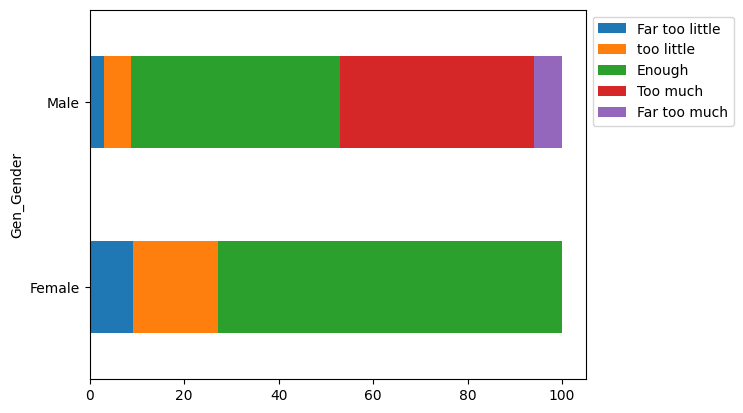

In [5]:
coding = {'Far too little':0, 'too little':1, 'Enough':2, 'Too much':3, 'Far too much':4}

# plotting the data in the stacked bar chart format
ps.vi_bar_stacked_multiple(data['Gen_Gender'], data['Mix_NrAct'], coding)

In [6]:
# Replacing the data in Mix_NrAct as numeric value of 0,1,2,3,4 as string data is present in it which cannot be used to apply mathematical visualization

myOrd = data['Mix_NrAct'].replace(coding)

# Storing the Gen_Gender values in diff variables as male and female
myBin1 = data['Gen_Gender'] == 'Male'
myBin2 = data['Gen_Gender'] == 'Female'

# Droping the null values from the data records

myOrd1 = myOrd[myBin1].dropna()
myOrd2 = myOrd[myBin2].dropna()

# Applying the Mann-Whitney U Test

from scipy.stats import mannwhitneyu

mannwhitneyu(myOrd1, myOrd2, alternative = 'two-sided', use_continuity = False)

MannwhitneyuResult(statistic=285.5, pvalue=0.0044363900107872375)

In [7]:
pvalue=0.0044363900107872375

# Since pvalue < 0.05, null value is rejected

In [8]:
# Calculating the effect size using the Rosenthal corelation coefficient

from scipy.stats import norm
Z = norm.ppf(pvalue/2)
n = len(myOrd1) + len(myOrd2)
r_roz = abs(Z / n**0.5)

if r_roz < 0.2:
  print('very low')
elif r_roz < 0.4:
  print('low')
elif r_roz < 0.6:
  print('moderate')
elif r_roz < 0.8:
  print('strong')
else:
  print('very strong')

moderate


In [9]:
r_roz

0.4241583947495162

The Mann Whitney U test has shown that there exist a relation between the Gender and Activities performed as pvalue = 0.0044 and it has a moderate effect on them as rosenthal corelation coefficient r_roz = 0.42